In [1]:
import random, pylab

In [2]:
# Zar Sonucunu Döndürür
def rollDie(): 
    return random.choice([1,2,3,4,5,6])

# n-kez atılan tüm zarları tek string olarak döndürür
def rollN(n):  
    result = ''
    for i in range(n):
        result = result + str(rollDie())
    return result

In [3]:
print("Atılan zarlar: ", rollN(5))

Atılan zarlar:  64625


In [4]:
# n-kez atılan parada tura gelme olasılığını döndürür
def flip(numFlips):  
    heads = 0.0
    for i in range(numFlips):
        if random.choice(('H', 'T')) == 'H':  # if random.random() < 0.5:
            heads += 1
    return heads/numFlips

In [5]:
print("Deneye göre tura gelme olasılığı: ", flip(10))

Deneye göre tura gelme olasılığı:  0.6


In [6]:
# deney sayısı ve her deneydeki deneme sayıları alınarak yapılan tura gelme olasılığını döndürür
def flipSim(numFlipsPerTrial, numTrials):   
    fracHeads = []
    for i in range(numTrials):
        fracHeads.append(flip(numFlipsPerTrial))
    mean = sum(fracHeads)/len(fracHeads)
    return mean

In [7]:
print("Deneylere göre tura gelme olasılığı: ", flipSim(1000, 1))

Deneylere göre tura gelme olasılığı:  0.499


In [8]:
def regressToMean(numFlips, numTrials):
    fracHeads = []
    for t in range(numTrials):
        fracHeads.append(flip(numFlips))
    extremes, nextTrials = [], []
    for i in range(len(fracHeads)-1):
        if fracHeads[i] < 0.33 or fracHeads[i] > 0.66:
            extremes.append(fracHeads[i])
            nextTrials.append(fracHeads[i+1])
    pylab.plot(range(len(extremes)), extremes, 'ko', label='Extreme')
    pylab.plot(range(len(nextTrials)), nextTrials, 'k^', label='Next Trial')
    pylab.axhline(0.5)
    pylab.ylim(0,1)
    pylab.xlim(-1, len(extremes)+1)
    pylab.xlabel('Extreme Example and Next Trial')
    pylab.ylabel('Fraction Heads')
    pylab.title('Regression to the Mean')
    pylab.legend(loc = 'best')

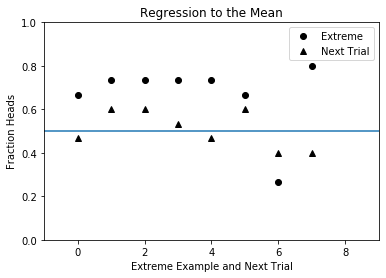

In [16]:
regressToMean(15,40)

In [17]:
def flipPlot(minExp, maxExp):
    ratios, diffs, xAxis = [], [], [] 
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        numHeads = 0
        for n in range(numFlips):
            if random.choice(('H', 'T')) == 'H':  # if random.random() < 0.5:
                numHeads += 1
        numTails = numFlips - numHeads
        try:
            ratios.append(numHeads/numTails)
            diffs.append(abs(numHeads - numTails))
        except ZeroDivisionError:
            continue
    pylab.title('Difference Between Heads and Tails')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('Abs(#Heads - #Tails)')
    pylab.plot(xAxis, diffs, 'k')
    pylab.figure()
    pylab.title('Heads/Tails Ratios')
    pylab.xlabel('Number of Flips')
    pylab.ylabel('#Heads/#Tails')
    pylab.plot(xAxis, ratios, 'k')

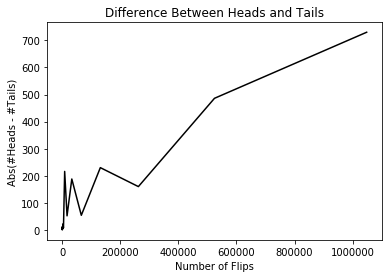

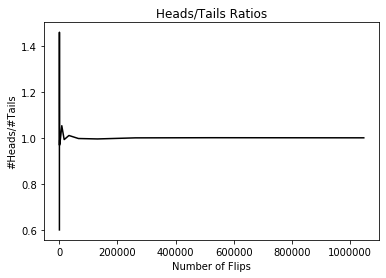

In [18]:
random.seed(0)
flipPlot(4, 20)

In [19]:
def variance(X):
    mean = float(sum(X))/len(X)
    tot = 0.0
    for x in X:
        tot += (x - mean)**2
    return tot/len(X)

def stdDev(X):
    return variance(X)**0.5

In [20]:
def makePlot(xVals, yVals, title, xLabel, yLabel, style,
             logX=False, logY=False):
    pylab.figure()
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    pylab.plot(xVals, yVals, style)
    if logX:
        pylab.semilogx()
    if logY:
        pylab.semilogy()

In [21]:
def runTrial(numFlips):
    numHeads = 0
    for n in range(numFlips):
        if random.choice(('H', 'T')) == 'H':  # if random.random() < 0.5:
            numHeads += 1
    numTails = numFlips - numHeads
    return (numHeads, numTails)

In [22]:
def flipPlot1(minExp, maxExp, numTrials):
    ratiosMeans, diffsMeans, ratiosSDs, diffsSDs = [], [], [], []
    xAxis = []
    for exp in range(minExp, maxExp + 1):
        xAxis.append(2**exp)
    for numFlips in xAxis:
        ratios, diffs = [], []
        try:
            for t in range(numTrials):
                numHeads, numTails = runTrial(numFlips)
                ratios.append(numHeads/numTails)
                diffs.append(abs(numHeads - numTails))
            ratiosMeans.append(sum(ratios)/numTrials)
            diffsMeans.append(sum(diffs)/numTrials)
            ratiosSDs.append(stdDev(ratios))
            diffsSDs.append(stdDev(diffs))
        except ZeroDivisionError:
            continue
            
    numTrialsString = ' (' + str(numTrials) + ' Trials)'
    
    title = 'Mean Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosMeans, title, 'Number of flips', 'Mean Heads/Tails', 'ko', logX=True)
    
    title = 'SD Heads/Tails Ratios' + numTrialsString
    makePlot(xAxis, ratiosSDs, title, 'Number of Flips', 'Standard Deviation', 'ko',
            logX=True, logY=True)

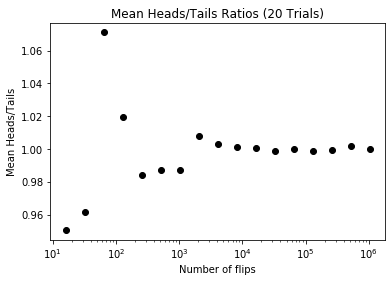

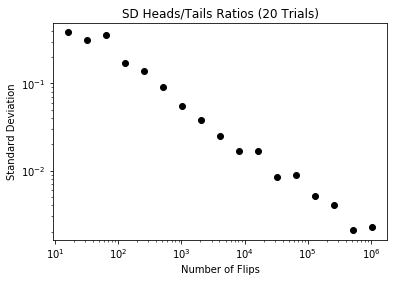

In [23]:
flipPlot1(4, 20, 20)